### <b>Deep Convolutional Neural Network for NLP/ sentiment analysis</b>

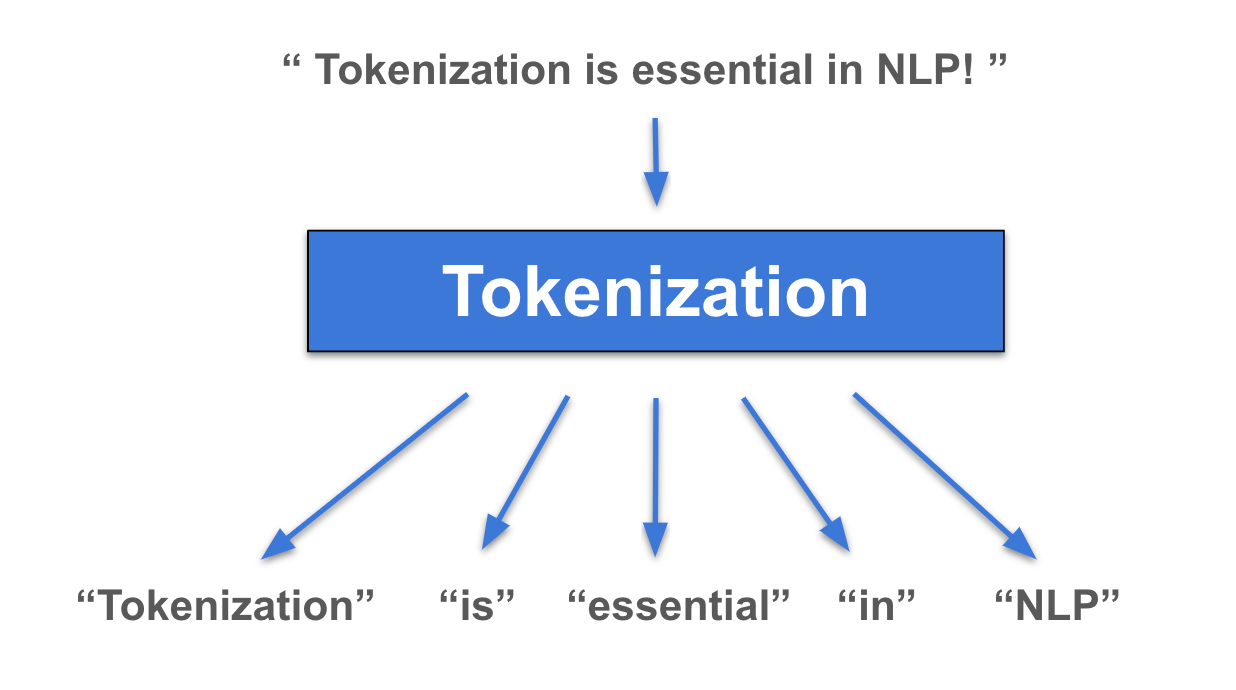
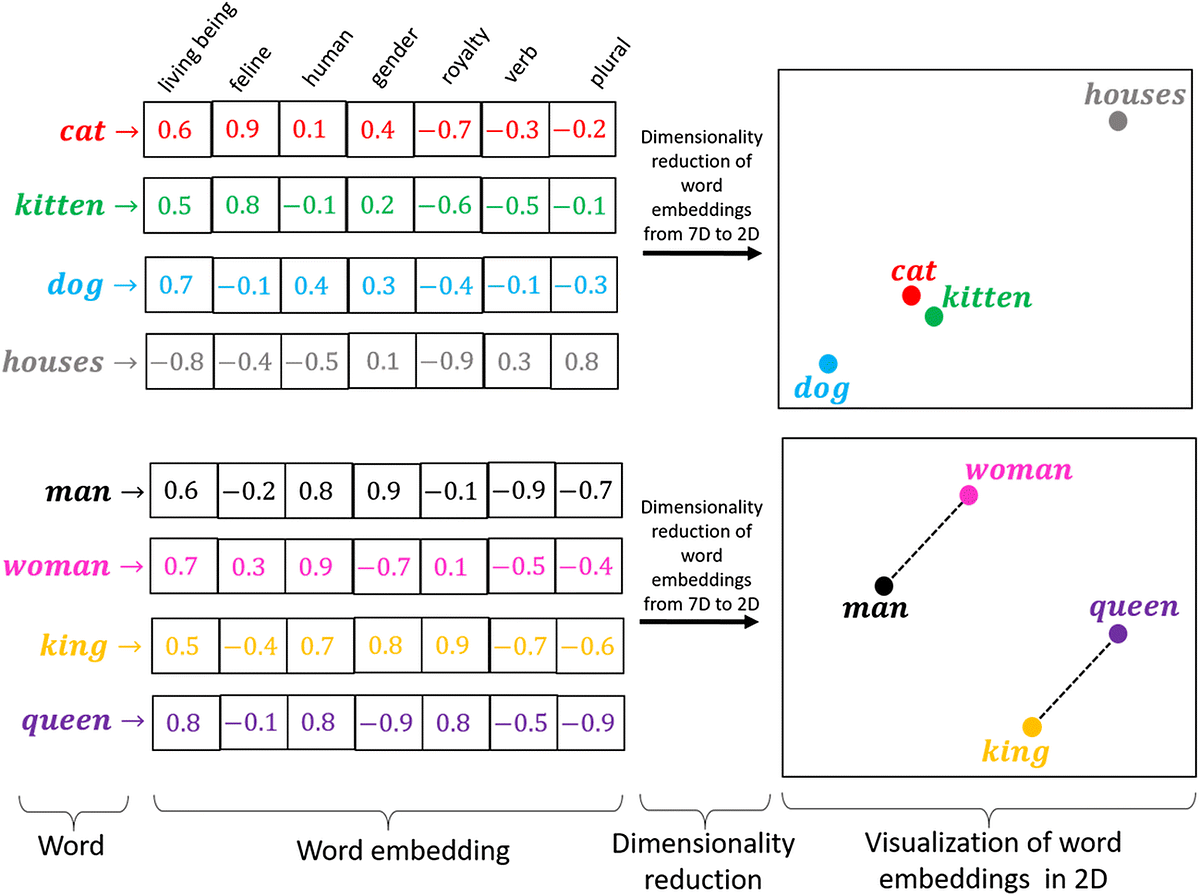
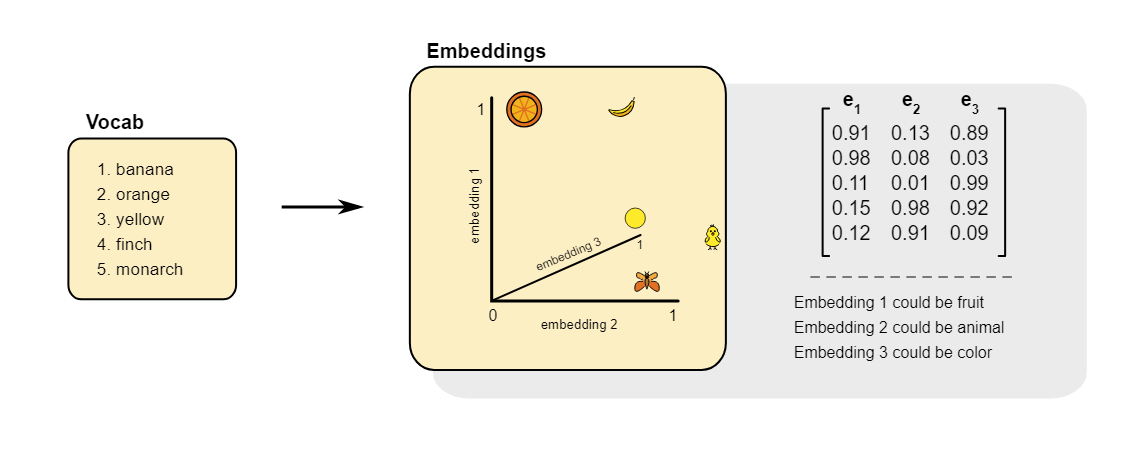
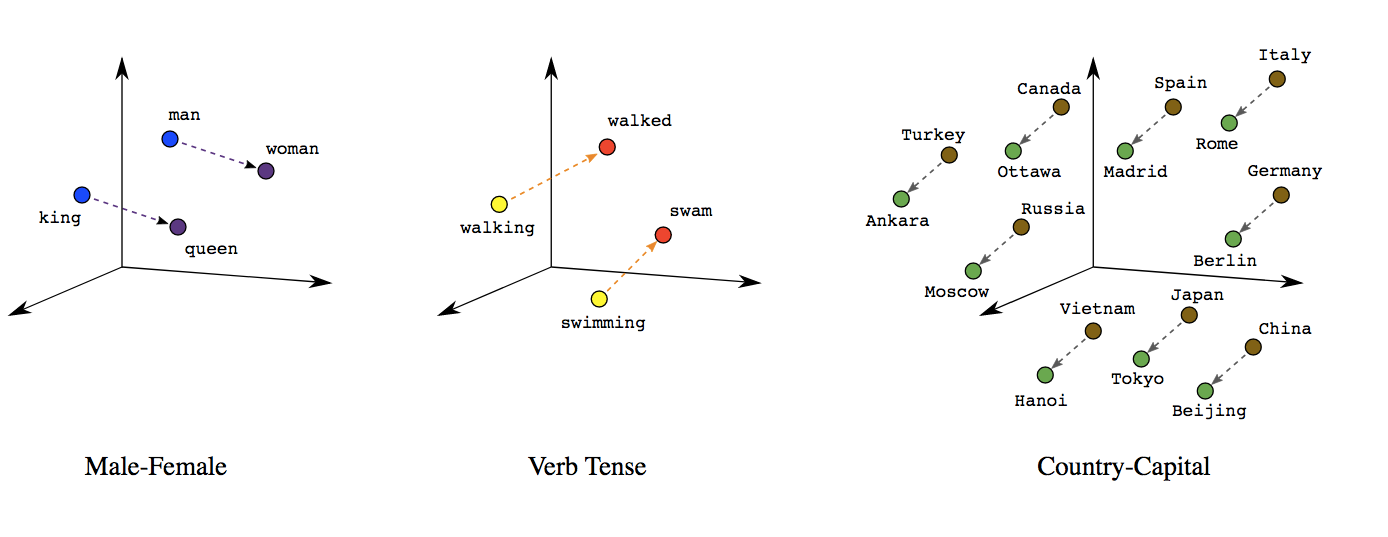
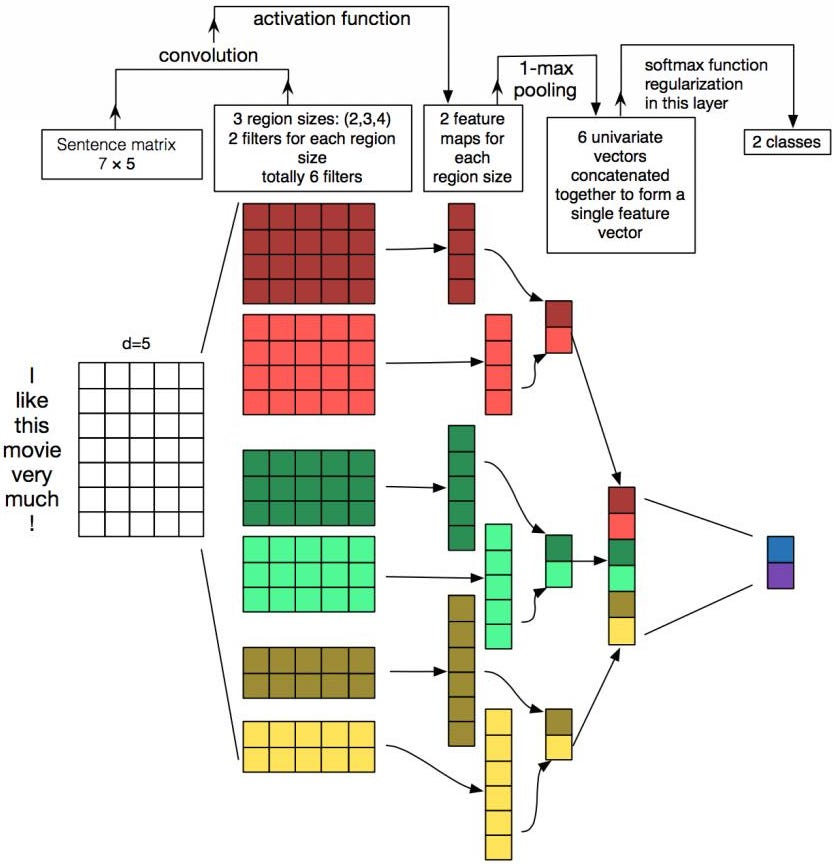
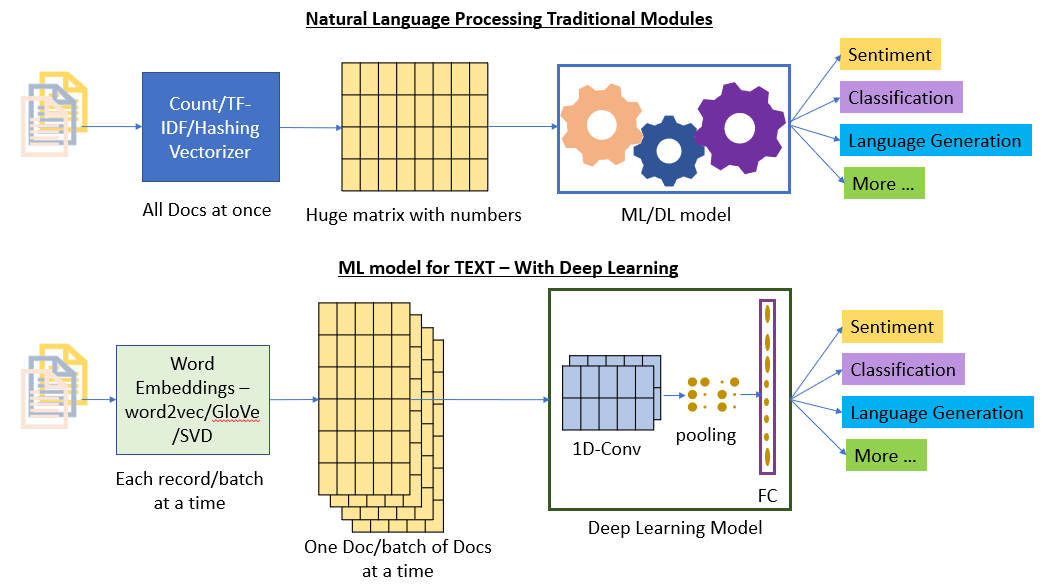
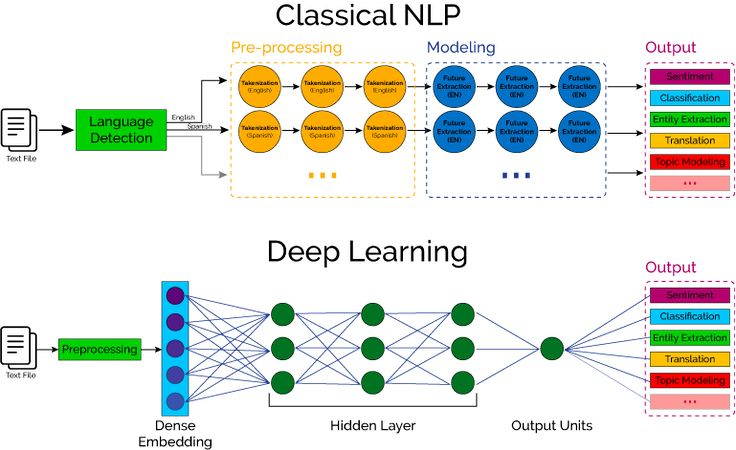
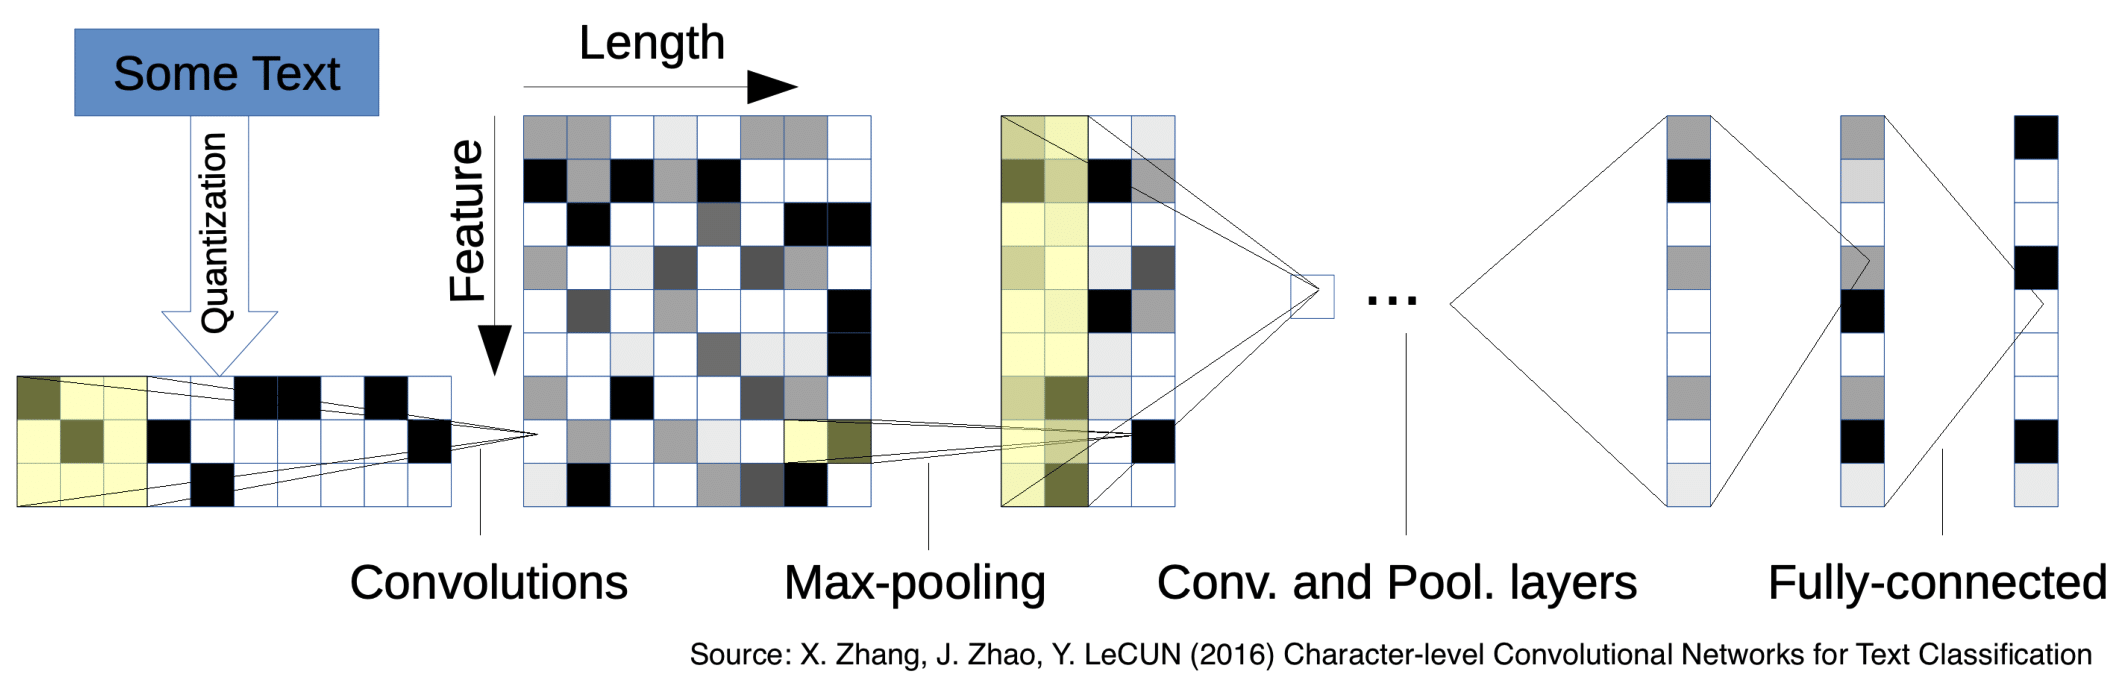
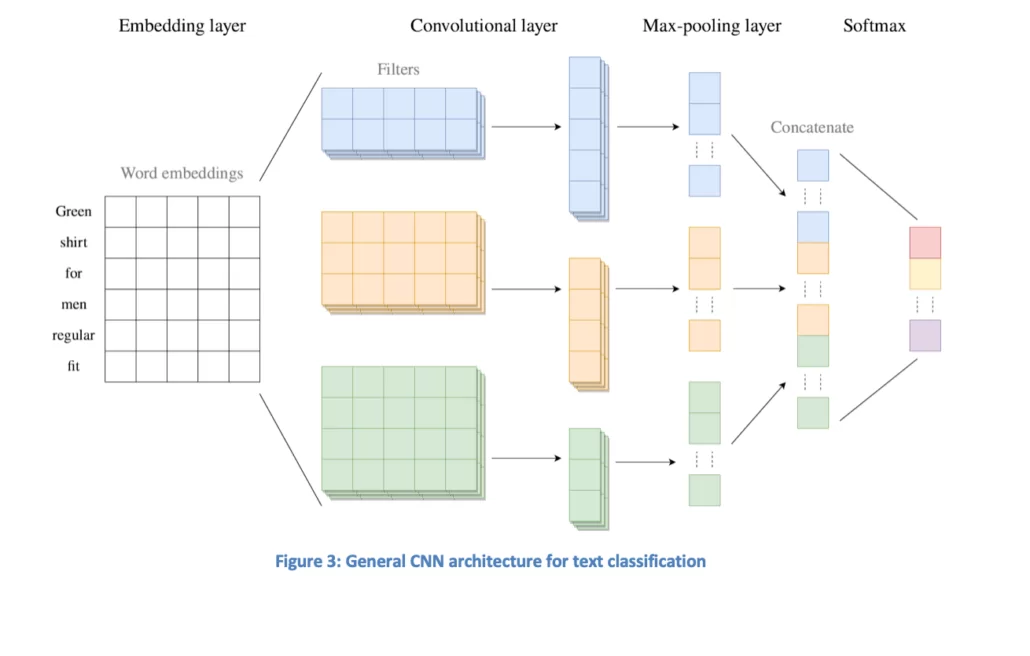

### <b>1. Importing/loading libraries</b>

In [232]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import tensorflow_datasets as tfds
import tensorflow as tf

### <b>2. Data preprocessing</b>

In [233]:
columns = ["sentiment", "id", "date", "query", "user", "text"]

training_data = pd.read_csv("training_data.csv", header = None, names = columns, engine = "python", encoding = "latin1")
test_data = pd.read_csv("test_data.csv", header = None, names = columns, engine = "python", encoding = "latin1")

size_of_training_data = len(training_data)
size_of_test_data = len(test_data)

print(f"Size of training data: {size_of_training_data}")
print(f"Size of test data: {size_of_test_data}")
print(f"Training data records: \n{training_data.head(10)}\n")
print(f"Test data 10 records: \n{test_data.head(10)}\n")

Size of training data: 1992
Size of test data: 498
Training data records: 
   sentiment  id                          date    query          user  \
0          4   3  Mon May 11 03:17:40 UTC 2009  kindle2        tpryan   
1          4   4  Mon May 11 03:18:03 UTC 2009  kindle2        vcu451   
2          4   5  Mon May 11 03:18:54 UTC 2009  kindle2        chadfu   
3          4   6  Mon May 11 03:19:04 UTC 2009  kindle2         SIX15   
4          4   7  Mon May 11 03:21:41 UTC 2009  kindle2      yamarama   
5          4   8  Mon May 11 03:22:00 UTC 2009  kindle2  GeorgeVHulme   
6          0   9  Mon May 11 03:22:30 UTC 2009      aig       Seth937   
7          4  10  Mon May 11 03:26:10 UTC 2009   jquery     dcostalis   
8          4  11  Mon May 11 03:27:15 UTC 2009  twitter       PJ_King   
9          4  12  Mon May 11 03:29:20 UTC 2009    obama   mandanicole   

                                                text  
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...  
1  Reading 

In [234]:
training_data.drop(["id", "date", "query", "user"], axis = 1, inplace = True)
test_data.drop(["id", "date", "query", "user"], axis = 1, inplace = True)

In [235]:
print(f"Training data: \n{training_data}\n")
print(f"Test data: \n{test_data}\n")

Training data: 
      sentiment                                               text
0             4  @stellargirl I loooooooovvvvvveee my Kindle2. ...
1             4  Reading my kindle2...  Love it... Lee childs i...
2             4  Ok, first assesment of the #kindle2 ...it fuck...
3             4  @kenburbary You'll love your Kindle2. I've had...
4             4  @mikefish  Fair enough. But i have the Kindle2...
...         ...                                                ...
1987          2  Ask Programming: LaTeX or InDesign?: submitted...
1988          0  On that note, I hate Word. I hate Pages. I hat...
1989          4  Ahhh... back in a *real* text editing environm...
1990          0  Trouble in Iran, I see. Hmm. Iran. Iran so far...
1991          0  Reading the tweets coming out of Iran... The w...

[1992 rows x 2 columns]

Test data: 
     sentiment                                               text
0            4  @stellargirl I loooooooovvvvvveee my Kindle2. ...
1         

In [236]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    tweet = re.sub(r"https?://[A-Za-z0-0./]+", ' ', tweet)
    tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    tweet = re.sub(r" +", " ", tweet)
    return tweet

def standard_sentiment(sentiment):
    if sentiment == 4:
        return 1
    return 0

training_text = np.array(training_data["text"].apply(clean_tweet))
training_sentiment = np.array(training_data["sentiment"].apply(standard_sentiment))

print(f"Training text: \n{training_text}\n")
print(f"Training sentiment: \n{training_sentiment}")

C:\Users\PanCh\AppData\Local\Temp\ipykernel_1420\2676678980.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


Training text: 
[' I loooooooovvvvvveee my Kindle . Not that the DX is cool but the is fantastic in its own right.'
 'Reading my kindle ... Love it... Lee childs is good read.'
 'Ok first assesment of the kindle ...it fucking rocks!!!' ...
 'Ahhh... back in a real text editing environment. I LaTeX.'
 'Trouble in Iran I see. Hmm. Iran. Iran so far away. flockofseagullsweregeopoliticallycorrect'
 'Reading the tweets coming out of Iran... The whole thing is terrifying and incredibly sad...']

Training sentiment: 
[1 1 1 ... 1 0 0]


In [237]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    training_text, target_vocab_size = 2**16
)

data_inputs = [tokenizer.encode(sentence) for sentence in training_text]

print(f"Data inputs: \n{data_inputs}\n")

MAX_LEN = max([len(sentence) for sentence in data_inputs])
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, value=0, padding="post", maxlen=MAX_LEN)

Data inputs: 
[[2744, 5, 1315, 13, 137, 50, 714, 37, 2, 426, 6, 1694, 40, 2, 6, 1562, 14, 89, 531, 518, 2758], [398, 13, 566, 108, 408, 24, 35, 2304, 1741, 6, 45, 1110, 2758], [712, 601, 1860, 12, 2, 566, 444, 23, 258, 516, 140], [2744, 1934, 2751, 126, 34, 67, 137, 50, 2785, 2751, 145, 98, 1282, 8, 4, 363, 1266, 7, 152, 553, 378, 1, 17, 28, 651, 113, 6, 1412, 11, 284, 241, 8, 1094, 11], [2744, 2465, 613, 1, 758, 18, 19, 2, 72, 7, 5, 317, 24, 2751, 9, 529], [2744, 539, 1, 23, 6, 177, 1827, 1, 2785, 2751, 29, 337, 193, 15, 2, 137, 301], [736, 42, 1613, 1, 5, 55, 1904, 7, 480, 1232, 1322, 1490, 1861, 2758], [2339, 6, 13, 28, 100, 1515, 2758], [2291, 468], [255, 118, 21, 33, 34, 134, 36, 80, 348, 1363, 38, 1430, 2758], [754, 42, 174, 52, 703, 91, 10, 2, 274, 291, 2542, 107, 2512], [2744, 5, 1535, 654, 37, 91, 283, 19, 1932, 1649, 3, 41, 1735, 1, 138, 2751, 9, 4, 1750, 7, 4, 231, 40, 76, 86, 3, 1647, 1703], [291, 2541, 366, 20, 97, 60, 823, 1839, 1030, 172, 91, 39, 4, 975, 1196], [1972, 24

### <b>3. Creating/fitting tne Deep Convolutional Neural Network model</b>

#### <b>3.1 Creating the DCNN</b>

In [238]:
class DCNN(tf.keras.Model):

    def __init__(self,
                 vocab_size,
                 embedding_dim = 128,
                 number_of_filters = 50,
                 feed_forward_units = 512,
                 number_of_classes = 2,
                 dropout_rate = 0.1,
                 training = False,
                 name = "DCNN"):
        super(DCNN, self).__init__(name = name)
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, 
                                                   embedding_dim)
        self.bigram = tf.keras.layers.Conv1D(filters = number_of_filters,
                                             kernel_size = 2,
                                             padding = "valid",
                                             activation = "relu")
        self.pool_1 = tf.keras.layers.GlobalMaxPool1D()
        self.trigram = tf.keras.layers.Conv1D(filters = number_of_filters,
                                              kernel_size = 3,
                                              padding = "valid",
                                              activation = "relu")
        self.pool_2 = tf.keras.layers.GlobalMaxPool1D()
        self.fourgram = tf.keras.layers.Conv1D(filters = number_of_filters,
                                               kernel_size = 4,
                                               padding = "valid",
                                               activation = "relu")
        self.pool_3 = tf.keras.layers.GlobalMaxPool1D()
        self.dense_1 = tf.keras.layers.Dense(units = feed_forward_units,
                                             activation = "relu")
        self.dropout = tf.keras.layers.Dropout(rate = dropout_rate)
        if number_of_classes == 2:
            self.last_dense = tf.keras.layers.Dense(units = 1,
                                                    activation = "sigmoid")
        else:
            self.last_dense = tf.keras.layers.Dense(units = number_of_classes,
                                                    activation = "softmax")
            
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool_1(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool_2(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool_3(x_3)
        
        merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size * number_of_filters)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output

#### <b>3.2 Fitting the Deep Convolutional Neural Network for NLP</b>

In [239]:
vocab_size = tokenizer.vocab_size
embedding_dimensions = 200
number_of_filters = 100
feed_forward_units = 256
number_of_classes = len(set(training_sentiment))
dropout_rate = 0.2
batch_size = 32
number_of_epochs = 5

deep_convolutional_neural_network = DCNN(
    vocab_size = vocab_size,
    embedding_dim = embedding_dimensions,
    number_of_filters = number_of_filters,
    feed_forward_units = feed_forward_units,
    number_of_classes = number_of_classes,
    dropout_rate = dropout_rate
)

if number_of_classes > 1:
    deep_convolutional_neural_network.compile(
        loss = "binary_crossentropy",
        optimizer = "adam",
        metrics = ["accuracy"]
    )
else:
    deep_convolutional_neural_network.compile(
        loss = "sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics = ["sparse_categorical_crossentropy"]
    )
    
deep_convolutional_neural_network.summary()

Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_39 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_39         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_40 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_40         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_41         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
deep_convolutional_neural_network.fit(
    training_text,
    training_sentiment,
    batch_size = batch_size,
    epochs = number_of_epochs
)